<a href="https://colab.research.google.com/github/rajveer0104/Deep-Learning/blob/main/Basic_knowledge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Activation functions

In [ ]:
import math
import numpy as np

In [ ]:
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
print(sigmoid(100),sigmoid(-500))

1.0 7.124576406741285e-218


In [ ]:
def tanh(x):
  z=(math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))
  return z

In [ ]:
print(tanh(-90))

-1.0


In [ ]:
def relu(x):
  return max(0,x)

In [ ]:
print(relu(-100))

0


In [ ]:
def reluLeaky(x):
  return max(0.1*x,x)

In [ ]:
reluLeaky(10)

10

In [ ]:
reluLeaky(-5)

-0.5

#Matrix

In [ ]:
revenue=np.array([[220,210,120],[50,40,110],[200,150,400]])
loss=np.array([[120,110,20],[20,20,10],[100,50,300]])
profit=revenue-loss
print(profit)

[[100 100 100]
 [ 30  20 100]
 [100 100 100]]


In [ ]:
units=np.array([[5,4,6]])

In [ ]:
total_profit=np.dot(units,profit)

In [ ]:
print(total_profit)

[[1220 1180 1500]]


#LOSS FUNCTIONS


In [ ]:
y_pred=np.array([1,1,0,0,1])
y_true=np.array([0.3,0.7,0.04,0.5,0.4])

In [ ]:
# mean absolute error
def mae(y_true,y_pred):
  total_error=0
  for x,y in zip(y_true,y_pred):
    total_error+=abs(x-y)
  print ("Total error:",total_error)
  mae=total_error/len(y_true)
  return mae

In [ ]:
mae(y_true,y_pred)
print(np.mean(np.abs(y_pred-y_true)))

Total error: 2.14
0.42800000000000005


In [ ]:

#log error
-np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))



/tmp/ipython-input-3142608809.py:2: RuntimeWarning: divide by zero encountered in log
  -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))


np.float64(inf)

#Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/insurance_data.csv')
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [ ]:
X=df.drop(columns='bought_insurance',axis=1)
Y=df['bought_insurance']
print(X)
print(Y)

    age  affordibility
0    22              1
1    25              0
2    47              1
3    52              0
4    46              1
5    56              1
6    55              0
7    60              0
8    62              1
9    61              1
10   18              1
11   28              1
12   27              0
13   29              0
14   49              1
15   55              1
16   25              0
17   58              1
18   19              0
19   18              1
20   21              1
21   26              0
22   40              1
23   45              1
24   50              1
25   54              1
26   23              1
27   46              1
0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
27    0
Name: bought_insurance, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=25)

In [ ]:
X_train_scaled =X_train.copy()
X_train_scaled['age']=X_train_scaled['age']/100

X_test_scaled =X_test.copy()
X_test_scaled['age']=X_test_scaled['age']/100

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros')

    ])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])
model.fit(X_train_scaled,Y_train,epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - Accuracy: 0.5000 - loss: 0.7113
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - Accuracy: 0.5000 - loss: 0.7110
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - Accuracy: 0.5000 - loss: 0.7106
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - Accuracy: 0.5000 - loss: 0.7102
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - Accuracy: 0.5000 - loss: 0.7098
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - Accuracy: 0.5000 - loss: 0.7094
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - Accuracy: 0.5000 - loss: 0.7091
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - Accuracy: 0.5000 - loss: 0.7087
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - Accuracy: 0.5000 - loss: 0.7083
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - Accuracy: 0.5000 - loss: 0.7079
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - Accuracy: 0.5000 - loss: 0.7076
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - Accuracy: 0.5000 - lo

In [ ]:
model.evaluate(X_test_scaled,Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - Accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [ ]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


In [ ]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)

In [ ]:
coef,intercept=model.get_weights()
print(coef)
print(intercept)

[[5.060863 ]
 [1.4086521]]
[-2.913703]


In [ ]:
def sigmoid(x):
  import math
  return 1/(1+math.exp(-x))
sigmoid (18)

0.9999999847700205

In [ ]:
def prediction_func(age,affordibility):
  z=coef[0]*age+coef[1]*affordibility+intercept
  return sigmoid(z)

In [ ]:
prediction_func(0.18,1)

/tmp/ipython-input-3124438013.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-x))


0.35569571637887243

In [ ]:
def sigmoid_numpy(x):
  return 1/(1+np.exp(-x))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true,y_predicted):
  epsilon=1e-15
  y_predicted_new=[max(i,epsilon) for i in y_predicted]
  y_predicted_new=[min(i,1-epsilon) for i in y_predicted_new]
  y_predicted_new=np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))


In [ ]:
class myNN:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.bias=0
  def gradient_descent(age,affordibility,y_true,epochs,loss_threshold):
    #w1,w2,bias
    w1=w2=1
    bias=0
    rate=0.5
    n=len(age)
    for i in range(epochs):
      z=w1*age+w2*affordibility+bias
      y_pre=sigmoid_numpy(z)

      loss=log_loss(y_true,y_pre)

      w1d=(1/n)*np.dot(np.transpose(age),(y_pre-y_true))
      w2d=(1/n)*np.dot(np.transpose(affordibility),(y_pre-y_true))

      biasd=np.mean(y_pre-y_true)

      w1=w1-rate*w1d
      w2=w2-rate*w2d
      bias=bias-rate*biasd
      if(i>450):
        print(f"Epoch:{i},w1:{w1},w2:{w2},bias:{bias},loss:{loss}")
      if loss<=loss_threshold:
        break

    return w1,w2,bias
  def predict(self,X_test):
    z=self.w1*X_test['age']+self.w2*X_test['affordibility']+self.bias
    return sigmoid_numpy(z)
  def fit(self,X,Y,epochs,loss_threshold):
    self.w1,self.w2,self.bias=myNN.gradient_descent(X['age'],X['affordibility'],Y,epochs,loss_threshold)

In [ ]:
custom=myNN()
custom.fit(X_train_scaled,Y_train,epochs=500,loss_threshold=0.4631)

In [ ]:
custom.predict(X_test_scaled)

,0
2,0.705020
10,0.355836
21,0.161599
11,0.477919
14,0.725586
9,0.828987


In [ ]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[0.7054848 ],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.7260696 ],
       [0.8294983 ]], dtype=float32)

#Precision , Recall , F1 score

In [ ]:
import seaborn as sns

In [ ]:


from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd


In [ ]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.

    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix.
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.

    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [ ]:
truth =      ["Dog","Not a dog","Dog","Dog",      "Dog", "Not a dog", "Not a dog", "Dog",       "Dog", "Not a dog"]
prediction = ["Dog","Dog",      "Dog","Not a dog","Dog", "Not a dog", "Dog",       "Not a dog", "Dog", "Dog"]

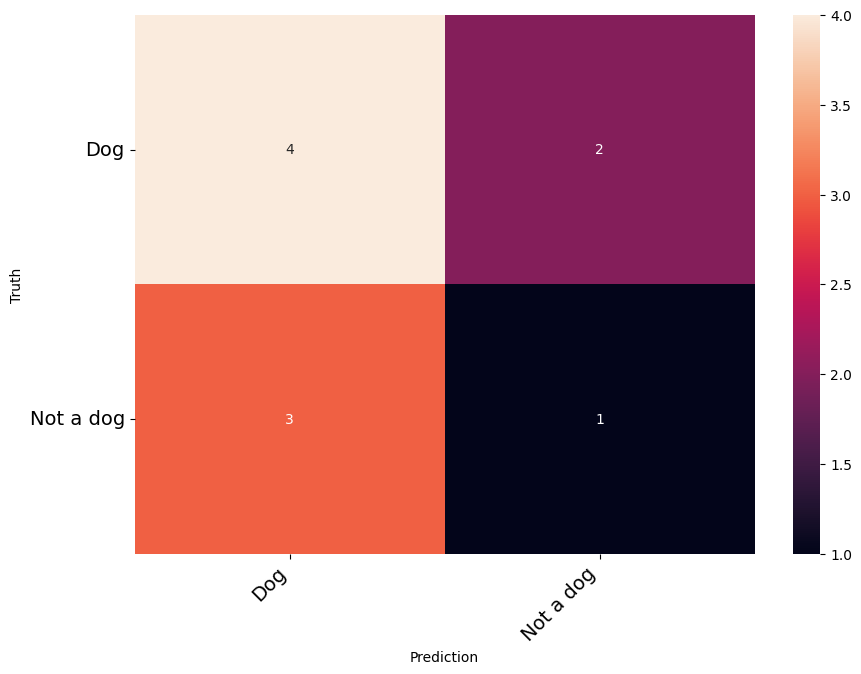

In [ ]:

cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Dog","Not a dog"])

In [ ]:

print(classification_report(truth, prediction))

              precision    recall  f1-score   support

         Dog       0.57      0.67      0.62         6
   Not a dog       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



In [ ]:

2*(0.57*0.67/(0.57+0.67))

0.6159677419354839

In [ ]:

2*(0.33*0.25/(0.33+0.25))

0.2844827586206896

#Dropout regularization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/sonar data.csv')

In [ ]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [ ]:
df['R']=LabelEncoder().fit_transform(df['R'])

In [ ]:
X=df.drop(columns='R',axis=1)
Y=df['R']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])
model.fit(X_train,Y_train,epochs=100,batch_size=8)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.5615 - loss: 0.6944
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6263 - loss: 0.6406 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6588 - loss: 0.6287 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6559 - loss: 0.6230 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.6824 - loss: 0.5842 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7640 - loss: 0.5319 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.7255 - loss: 0.5742 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8140 - loss: 0.4685 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8204 - loss: 0.4252 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8302 - loss: 0.4062 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8131 - loss: 0.3829 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0

In [ ]:
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - Accuracy: 0.8313 - loss: 0.8146 


[0.8348349332809448, 0.8095238208770752]

In [ ]:
#loss is high because the model overfitted

In [ ]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)
print(y_pred[:10])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


In [ ]:
Y_test[:10]

,R
186,0
155,0
165,0
200,0
58,1
34,1
151,0
18,1
202,0
62,1


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        20
           1       0.94      0.68      0.79        22

    accuracy                           0.81        42
   macro avg       0.83      0.82      0.81        42
weighted avg       0.84      0.81      0.81        42



In [ ]:
model=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])
model.fit(X_train,Y_train,epochs=100,batch_size=8)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.5010 - loss: 0.7467
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.5192 - loss: 0.7668 
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.4763 - loss: 0.6951 
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.4787 - loss: 0.7035 
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.5101 - loss: 0.6771 
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.5563 - loss: 0.7150 
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.5377 - loss: 0.6880 
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.5523 - loss: 0.6741 
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.4971 - loss: 0.7302 
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.5387 - loss: 0.6912 
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.4998 - loss: 0.7003 
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0

In [ ]:
#no overfitting
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - Accuracy: 0.8472 - loss: 0.4794


[0.4944412112236023, 0.8333333134651184]

In [ ]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)
print(y_pred[:10])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
[0. 0. 0. 0. 1. 0. 1. 0. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.94      0.73      0.82        22

    accuracy                           0.83        42
   macro avg       0.85      0.84      0.83        42
weighted avg       0.85      0.83      0.83        42



#Dropout Regularization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/sonar data.csv")

In [ ]:
df.shape

(207, 61)

In [ ]:
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [ ]:
X=df.drop(columns='R',axis='columns')
Y=df['R']
Y

,R
0,R
1,R
2,R
3,R
4,R
...,...
202,M
203,M
204,M
205,M


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=2)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=100,batch_size=8)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4632 - loss: 0.6911
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5766 - loss: 0.6756 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5128 - loss: 0.6745 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5680 - loss: 0.6536 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6612 - loss: 0.6023 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7855 - loss: 0.5908 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8093 - loss: 0.5395 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8381 - loss: 0.4898 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8517 - loss: 0.4160 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8177 - loss: 0.4262 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8771 - loss: 0.3948
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.

In [ ]:
model.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7885 - loss: 1.0137 


[0.8732999563217163, 0.807692289352417]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)
print(classification_report(Y_test,y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.95      0.67      0.78        27

    accuracy                           0.81        52
   macro avg       0.84      0.81      0.81        52
weighted avg       0.84      0.81      0.80        52



In [ ]:
model1=keras.Sequential([
    keras.layers.Dense(60,input_dim=60,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model1.fit(X_train,Y_train,epochs=100,batch_size=8)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5194 - loss: 0.8348
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4710 - loss: 0.7869
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4681 - loss: 0.7419
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5527 - loss: 0.6978
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5407 - loss: 0.6827
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5478 - loss: 0.6855
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5232 - loss: 0.6994
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5858 - loss: 0.6857
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5260 - loss: 0.6801
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5212 - loss: 0.6901
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5558 - loss: 0.6956
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4606 - lo

In [ ]:
model1.evaluate(X_test,Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8478 - loss: 0.4713 


[0.42841818928718567, 0.8653846383094788]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model1.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)
print(classification_report(Y_test,y_pred))

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.95      0.78      0.86        27

    accuracy                           0.87        52
   macro avg       0.88      0.87      0.86        52
weighted avg       0.88      0.87      0.86        52



# Handling imbalanced dataset

In [ ]:
import pandas as pd
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Churn']=encoder.fit_transform(df['Churn'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df.shape

(7043, 21)

In [ ]:
df['Churn'].value_counts()


,count
Churn,
0,5174
1,1869


In [ ]:
#class count
count_class_0,count_class_1=df['Churn'].value_counts()
print (count_class_0,count_class_1)
df_class_0=df[df['Churn']==0]
df_class_1=df[df['Churn']==1]

5174 1869


In [ ]:
#sample function basically provides random n number of data points
df.sample(2)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5285,9479-HYNYL,Female,0,Yes,No,71,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),80.7,5705.05,0
1440,7677-SJJJK,Male,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.9,153.95,0


Method 1:Undersampling

In [ ]:
#here we undersample the 0 churn value data points and make a new data frame
df_class_0_under=df_class_0.sample(count_class_1)
df_new=pd.concat([df_class_0_under,df_class_1],axis=0)
df_new['Churn'].value_counts()

,count
Churn,
0,1869
1,1869


In [ ]:
import numpy as np


In [ ]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(31, input_dim=X_train.shape[1], activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
y_preds=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4752 - loss: 37.9012
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4659 - loss: 2.4576
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5805 - loss: 1.3406
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6588 - loss: 0.8562
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6561 - loss: 0.9588
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6773 - loss: 0.9182
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6336 - loss: 1.0557
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6969 - loss: 0.7798
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6971 - loss: 0.7687
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6806 - loss: 0.8589
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7178 - loss: 0.7538
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6810 - l

In [ ]:
print(X_train.dtypes)

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
dtype: object


Method 2: Oversampling

In [ ]:
count_class_0,count_class_1

(5174, 1869)

In [ ]:
df_class_1.sample(count_class_0,replace=True).shape

(5174, 21)

In [ ]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_new=pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
X=df_new.drop(columns='Churn',axis=1)
Y=df_new['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

# Convert 'TotalCharges' to numeric, handling errors
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

# Fill any resulting NaNs with 0 (or another appropriate value)
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(0)
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(0)


#dropping first object column
X_train=X_train.drop(columns='customerID',axis=1)
X_test=X_test.drop(columns='customerID',axis=1)

# Identify object columns
object_cols = X_train.select_dtypes(include='object').columns

# Apply one-hot encoding
X_train = pd.get_dummies(X_train, columns=object_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=object_cols, drop_first=True)

# Ensure columns match after one-hot encoding
X_train, X_test = X_train.align(X_test, join='inner', axis=1, fill_value=0)

# Convert boolean columns to integer
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)

In [ ]:
df_new['Churn'].value_counts()

,count
Churn,
0,5174
1,5174


In [ ]:
X=df_new.drop(columns='Churn',axis=1)
Y=df_new['Churn']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

# Convert 'TotalCharges' to numeric, handling errors
X_train['TotalCharges'] = pd.to_numeric(X_train['TotalCharges'], errors='coerce')
X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')

# Fill any resulting NaNs with 0 (or another appropriate value)
X_train['TotalCharges'] = X_train['TotalCharges'].fillna(0)
X_test['TotalCharges'] = X_test['TotalCharges'].fillna(0)


#dropping first object column
X_train=X_train.drop(columns='customerID',axis=1)
X_test=X_test.drop(columns='customerID',axis=1)



# Apply one-hot encoding
X_train = pd.get_dummies(X_train, columns=object_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=object_cols, drop_first=True)

# Ensure columns match after one-hot encoding
X_train, X_test = X_train.align(X_test, join='inner', axis=1, fill_value=0)

# Convert boolean columns to integer
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)

for col in X_test.columns:
    if X_test[col].dtype == 'bool':
        X_test[col] = X_test[col].astype(int)

In [ ]:
Y_train.value_counts()

,count
Churn,
0,4139
1,4139


In [ ]:
y_preds=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6020 - loss: 47.9354
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6958 - loss: 0.8044
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7076 - loss: 0.8134
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6918 - loss: 1.0916
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7106 - loss: 0.7603
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6932 - loss: 1.2430
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7290 - loss: 0.7021
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7131 - loss: 0.8381
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7285 - loss: 0.6705
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7249 - loss: 0.6616
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7356 - loss: 0.7170
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

Method 3 : SMOTE

In [ ]:
X=df.drop(columns='Churn',axis='columns')
Y=df['Churn']
Y.value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
X.dtypes,Y.dtypes

(customerID           object
 gender               object
 SeniorCitizen         int64
 Partner              object
 Dependents           object
 tenure                int64
 PhoneService         object
 MultipleLines        object
 InternetService      object
 OnlineSecurity       object
 OnlineBackup         object
 DeviceProtection     object
 TechSupport          object
 StreamingTV          object
 StreamingMovies      object
 Contract             object
 PaperlessBilling     object
 PaymentMethod        object
 MonthlyCharges      float64
 TotalCharges         object
 dtype: object,
 dtype('int64'))

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [ ]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto')
X_sm,Y_sm=smote.fit_resample(X,Y)
Y_sm.value_counts()

,count
Churn,
0,5174
1,5174


In [ ]:
  Y.value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.2,random_state=2,stratify=Y_sm)

In [ ]:
Y_train.value_counts(),Y_test.value_counts()

(Churn
 0    4139
 1    4139
 Name: count, dtype: int64,
 Churn
 0    1035
 1    1035
 Name: count, dtype: int64)

In [ ]:
y_preds=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5050 - loss: 130.9720
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6096 - loss: 1.6696
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6245 - loss: 2.0386
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6987 - loss: 1.1392
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6739 - loss: 1.4025
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6866 - loss: 1.3593
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6875 - loss: 1.3252
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7084 - loss: 1.3056
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6805 - loss: 1.5411
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7131 - loss: 1.2003
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6739 - loss: 1.5534
Epoch 12/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/st

Method 4: Use of ensemble with undersampling

In [ ]:
X=df.drop(columns='Churn',axis='columns')
Y=df['Churn']
Y.value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [ ]:
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = encoder.fit_transform(X[col])

In [ ]:
X.dtypes

,0
customerID,int64
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64


In [ ]:
Y.value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [ ]:
Y_train.value_counts(),Y_test.value_counts()

(Churn
 0    4139
 1    1495
 Name: count, dtype: int64,
 Churn
 0    1035
 1     374
 Name: count, dtype: int64)

In [ ]:
df3=X_train.copy()
df3['Churn']=Y_train

In [ ]:
df3_class_0=df3[df['Churn']==0]
df3_class_1=df3[df['Churn']==1]

/tmp/ipython-input-3222788212.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3_class_0=df3[df['Churn']==0]
/tmp/ipython-input-3222788212.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3_class_1=df3[df['Churn']==1]


In [ ]:
df3_class_0.shape,df3_class_1.shape

((4139, 21), (1495, 21))

In [ ]:
def get_train_batch(df_majority,df_minority,start,end):

  df_train=pd.concat([df_majority[start:end],df_minority],axis=0)

  X_train=df_train.drop(columns='Churn')
  Y_train=df_train['Churn']

  return X_train,Y_train

In [ ]:
X_train,Y_train=get_train_batch(df3_class_0,df3_class_1,0,1495)
y_pred1=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4980 - loss: 93.2210 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5755 - loss: 5.5904
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6155 - loss: 2.8013
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6286 - loss: 2.8394
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6628 - loss: 2.0207
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6450 - loss: 2.4790
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6614 - loss: 2.2124
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6095 - loss: 4.1018
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6982 - loss: 1.6437
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - loss: 1.6628
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6797 - loss: 1.4147
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6780 - 

In [ ]:
X_train,Y_train=get_train_batch(df3_class_0,df3_class_1,1495,2990)
y_pred2=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5214 - loss: 48.8126
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5517 - loss: 2.4283
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5864 - loss: 1.7485
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 1.2301
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6448 - loss: 1.3698
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6422 - loss: 1.4207
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6432 - loss: 1.5355
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6841 - loss: 1.1205
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - loss: 0.9786
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 1.0315
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6208 - loss: 1.7065
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6603 - l

In [ ]:
X_train,Y_train=get_train_batch(df3_class_0,df3_class_1,2990,4130)
y_pred3=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5150 - loss: 56.9015
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5558 - loss: 2.8086
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 2.0705
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6438 - loss: 1.6058
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - loss: 1.4599
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6542 - loss: 1.5817
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6713 - loss: 1.2177
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - loss: 1.6219
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6077 - loss: 2.4150
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6350 - loss: 1.7890
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6669 - loss: 1.4846
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6370 - l

In [ ]:
y_pred3

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
len(y_pred2)

1409

In [ ]:
y_pred_final=y_pred1.copy()
for i in range(len(y_pred_final)):
  if (y_pred1[i]+y_pred2[i]+y_pred3[i])>=2:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0

EXERCISE

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(13, input_dim=X_train.shape[1], activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [ ]:
import pandas as pd
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
count_0,count_1=df['Exited'].value_counts()

df_class_0=df[df['Exited']==0]
df_class_1=df[df['Exited']==1]

In [ ]:
len(df_class_0)==count_0

True

In [ ]:
df_under=pd.concat([df_class_0.sample(count_1),df_class_1],axis=0)
df_under.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
897,898,15782390,T'ien,621,France,Female,40,6,0.00,1,1,0,155155.25,0
783,784,15745196,Verco,571,France,Female,35,8,0.00,2,0,0,84569.13,0
3788,3789,15707110,Endrizzi,660,Germany,Male,28,2,170890.05,2,1,0,41758.90,0
2415,2416,15574886,Palerma,706,France,Male,32,6,94486.47,1,1,1,146949.74,0
9145,9146,15621768,Chukwuhaenye,712,Spain,Male,45,6,112994.65,1,0,0,198398.68,0


In [ ]:
df_under['Exited'].value_counts()

,count
Exited,
0,2037
1,2037


In [ ]:
# Drop duplicate columns
df_under = df_under.loc[:, ~df_under.columns.duplicated()]

for col in df_under:
  if df_under[col].dtypes=='object':
    df_under[col]=le.fit_transform(df_under[col])

In [ ]:
X=df_under.drop(columns='Exited')
Y=df_under['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [ ]:
Y_train.value_counts(),Y_test.value_counts()

(Exited
 1    1630
 0    1629
 Name: count, dtype: int64,
 Exited
 0    408
 1    407
 Name: count, dtype: int64)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_p=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5010 - loss: 25054.2832
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 11126.2461
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4845 - loss: 15591.7861
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 19952.8047
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4904 - loss: 16220.3701
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4949 - loss: 14497.4092
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 7182.4736
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5104 - loss: 17207.0527
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5223 - loss: 14517.0381
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4992 - loss: 8880.3096
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5123 - loss: 10414.1035
Epoch 12/10

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns to scale:", numerical_cols)

Numerical columns to scale: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
count_0,count_1

(7963, 2037)

In [ ]:
#over sample
df_class_0=df[df['Exited']==0]
df_class_1=df[df['Exited']==1]
df_class_1_over=df_class_1.sample(count_0,replace=True)
len(df_class_1_over)
df_new=pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
df_new['Exited'].value_counts()

,count
Exited,
0,7963
1,7963


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for col in df_new :
  if df_new[col].dtype=='object':
    df_new[col]=le.fit_transform(df_new[col])

In [ ]:
df_new.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,int64
CreditScore,int64
Geography,int64
Gender,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
X=df_new.drop(columns='Exited')
Y=df_new['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [ ]:
Y_train.value_counts()

,count
Exited,
1,6370
0,6370


In [ ]:
ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5165 - loss: 48323.4922
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5027 - loss: 14863.4209
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5137 - loss: 16512.0625
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5086 - loss: 12855.6025
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5170 - loss: 11255.6934
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5214 - loss: 8234.4229
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5270 - loss: 6325.4380
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5085 - loss: 11076.8408
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5095 - loss: 6967.0552
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5041 - loss: 12081.5010
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5188 - loss: 11201.7158
Epoch 12/100

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
X=df_new.drop(columns='Exited')
Y=df_new['Exited']
smo=SMOTE(sampling_strategy='minority')
X_sm,Y_sm=smo.fit_resample(X,Y)
Y_sm.value_counts()

,count
Exited,
0,7963
1,7963


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.2,random_state=2,stratify=Y_sm)

In [ ]:
ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4901 - loss: 129816.8828
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5055 - loss: 11303.8086
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5043 - loss: 9486.6084
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5113 - loss: 8225.9053
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5127 - loss: 8537.7100
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5091 - loss: 7349.6377
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5093 - loss: 6486.6128
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5194 - loss: 7542.7896
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5140 - loss: 6582.2119
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5247 - loss: 6184.7827
Epoch 11/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5150 - loss: 4779.1733
Epoch 12/100
399/

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
#ensemble learning
X=df_new.drop(columns='Exited')
Y=df_new['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [ ]:
def get_train_batch(df_majority,df_minority,start,end):

  df_train=pd.concat([df_majority[start:end],df_minority],axis=0)

  X_train=df_train.drop(columns='Exited')
  Y_train=df_train['Exited']

  return X_train,Y_train

In [ ]:
X_train,Y_train=get_train_batch(df_class_0,df_class_1,0,1495)
y_pred1=ANN(X_train,Y_train,X_test,Y_test,'binary_crossentropy',-1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Invalid dtype: object